In [ ]:
ANALYZING DATASET ABOUT WINE 

In [42]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


In [43]:
# importing dataset
df = pd.read_csv("WineDataset.csv", delimiter=",", index_col=0)
df.head(4)


,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
Title,,,,,,,,,,,,,,,,
"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
"Bread & Butter 'Winemaker's Selection' Chardonnay 2020/21, California",This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon


In [44]:
# basic information about dataset
data_first_count=len(df)
print(f'Number of rows: {data_first_count} ')

df.info()
df.describe()
df.isna().sum()

Number of rows: 1290 
<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, The Guv'nor, Spain to Yalumba 'Virgilius' Viognier 2017, Eden Valley
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Description                1286 non-null   object 
 1   Price                      1290 non-null   object 
 2   Capacity                   1290 non-null   object 
 3   Grape                      1275 non-null   object 
 4   Secondary Grape Varieties  488 non-null    object 
 5   Closure                    1279 non-null   object 
 6   Country                    1284 non-null   object 
 7   Unit                       1281 non-null   float64
 8   Characteristics            1253 non-null   object 
 9   Per bottle / case / each   1290 non-null   object 
 10  Type                       1285 non-null   object 
 11  ABV                        1281 non-null   object 
 12  Region                     1

Description                    4
Price                          0
Capacity                       0
Grape                         15
Secondary Grape Varieties    802
Closure                       11
Country                        6
Unit                           9
Characteristics               37
Per bottle / case / each       0
Type                           5
ABV                            9
Region                       166
Style                         78
Vintage                        7
Appellation                  646
dtype: int64

In [45]:
df_cleaned=df.dropna()


In [46]:
# Filter only wines sold "per bottle"
df_cleaned = df[df['Price'].str.contains('per bottle', na=False)].copy()

# Row count after filtering
data_second_count = len(df_cleaned)
print(f'Number of rows after filtering: {data_second_count}')

# In my next step I will clear the price values
# '£59.94 per bottle' --> '59.94'
df_cleaned['Price'] = df_cleaned['Price'].str.replace('£', '').str.replace(' per bottle', '').astype(float)
df_cleaned.head(3)

# I will change ABV (Alcohol By Volume) 
# 'ABV 14%' --> '14'
df_cleaned[~df_cleaned['ABV'].str.contains('ABV', na=False)]
df_cleaned['ABV'] = df_cleaned['ABV'].str.replace('ABV', '').str.replace('%', '').astype(float)
df_cleaned.head(3)

df_cleaned = df_cleaned.dropna(subset=['Price', 'ABV'])
df_cleaned

Number of rows after filtering: 1279


,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
Title,,,,,,,,,,,,,,,,
"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,14.0,NaN,Rich & Juicy,NV,NaN
"Bread & Butter 'Winemaker's Selection' Chardonnay 2020/21, California",This really does what it says on the tin. It’s...,15.99,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,13.5,California,Rich & Toasty,2021,Napa Valley
"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,12.49,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,13.0,Marlborough,Crisp & Zesty,2022,NaN
Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,17.99,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,13.5,Burgundy,Ripe & Rounded,2022,Macon
"Bread & Butter 'Winemaker's Selection' Pinot Noir 2021, California",Bread & Butter is that thing that you can coun...,15.99,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,13.5,California,Smooth & Mellow,2021,Napa Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,11.99,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,12.5,Loire,Aromatic & Floral,2021,Vouvray
"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,13.99,75CL,Pinot Noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,13.0,Nelson,Delicate & Dry,2021,NaN
Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,85.00,75CL,Cabernet Sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,13.5,South Australia,Savoury & Full Bodied,2010,Clare Valley


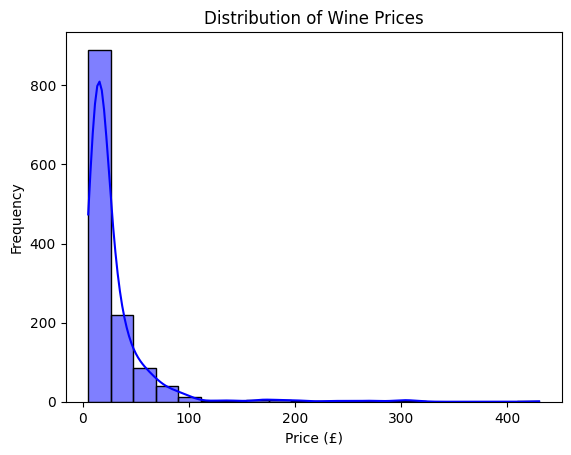

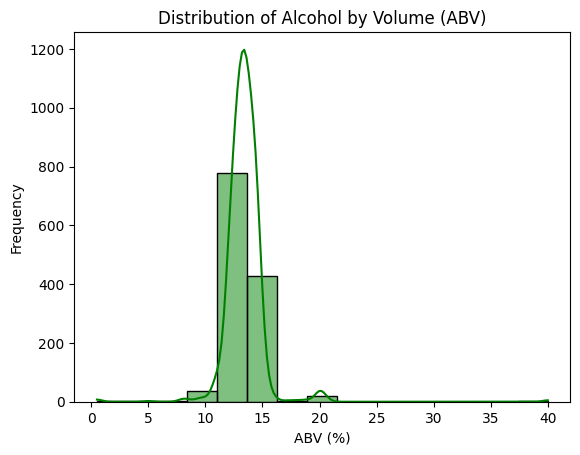

In [47]:
# DISTRIBUTIONS:
# Distribution of Price
sns.histplot(df_cleaned['Price'], kde=True, bins=20, color='blue')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# Distribution of ABV
sns.histplot(df_cleaned['ABV'], kde=True, bins=15, color='green')
plt.title('Distribution of Alcohol by Volume (ABV)')
plt.xlabel('ABV (%)')
plt.ylabel('Frequency')
plt.show()

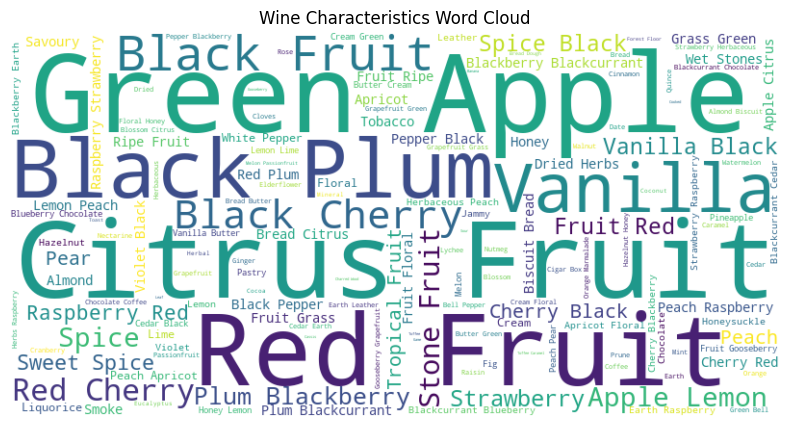

  Characteristic  Frequency
0         Fruit,        613
1          Black        487
2            Red        387
3          Green        264
4         Citrus        235
5         Apple,        216
6        Cherry,        208
7          Fruit        206
8       Vanilla,        180
9          Plum,        175


In [48]:
# something funky ;)
# Combine all characteristics into a single string
all_characteristics = " ".join(df_cleaned['Characteristics'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_characteristics)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wine Characteristics Word Cloud')
plt.show()

# Frequency distribution of the top words
characteristic_counts = Counter(all_characteristics.split())
top_characteristics = pd.DataFrame(characteristic_counts.most_common(10), columns=['Characteristic', 'Frequency'])
print(top_characteristics)


Kind of wines: ['Red' 'White' 'Brown' 'Rosé' nan 'Orange' 'Tawny']



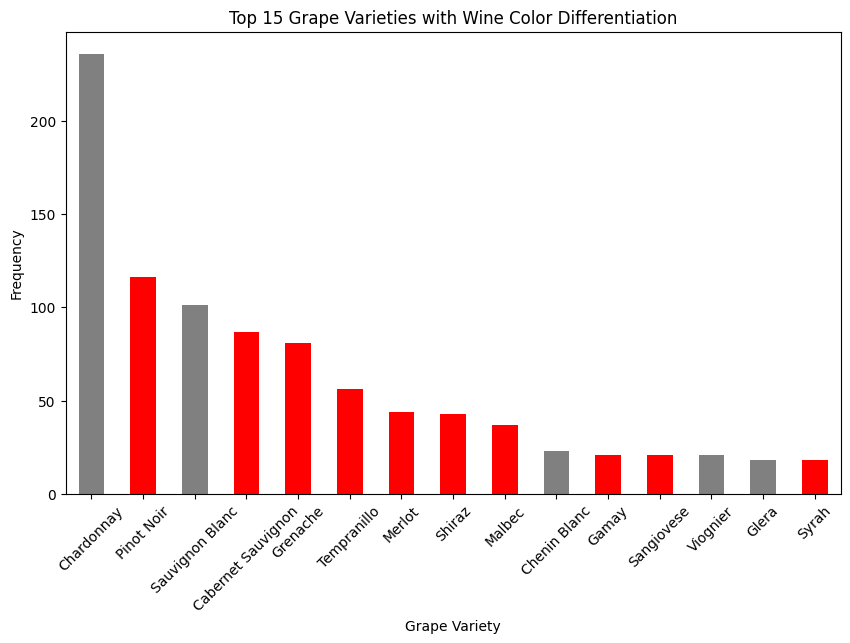

In [49]:
# Count of each grape variety
grape_counts = df_cleaned['Grape'].value_counts()

# Top 15 grape varieties
top_15_grape_varieties = grape_counts.head(15)

kind_of_vines = df_cleaned['Type'].unique()
print(f"Kind of wines: {kind_of_vines}\n")
# Define a mapping of wine types to colors

# I attribute colors to different wine colors
type_color_mapping = {
    'Red': 'red',
    'White': 'grey',
    'Rosé': 'pink',
    'Orange': 'orange',
    'Tawny': 'brown',
    'Brown': 'brown'
}

# Dynamically assign a color to each grape variety based on its wine type
# For each grape variety in the top 15, we map it to its most frequent type
# We'll assume that the most common type for each grape is representative

grape_type_mapping = (
    df_cleaned.groupby('Grape')['Type']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')  # Get the most frequent wine type
    .to_dict()
)

# Get the colors corresponding to the top 15 grape varieties based on the wine type
colors = [type_color_mapping.get(grape_type_mapping.get(grape, 'Unknown'), 'gray') for grape in top_15_grape_varieties.index]

# Plot: 

plt.figure(figsize=(10, 6))
top_15_grape_varieties.plot(kind='bar', color=colors)
plt.title('Top 15 Grape Varieties with Wine Color Differentiation')
plt.xlabel('Grape Variety')
plt.ylabel('Frequency')
# We can rotate x-axis for better readability
plt.xticks(rotation=45) 
plt.show()

# In first 15 grape varieties, colors red and white are dominant.


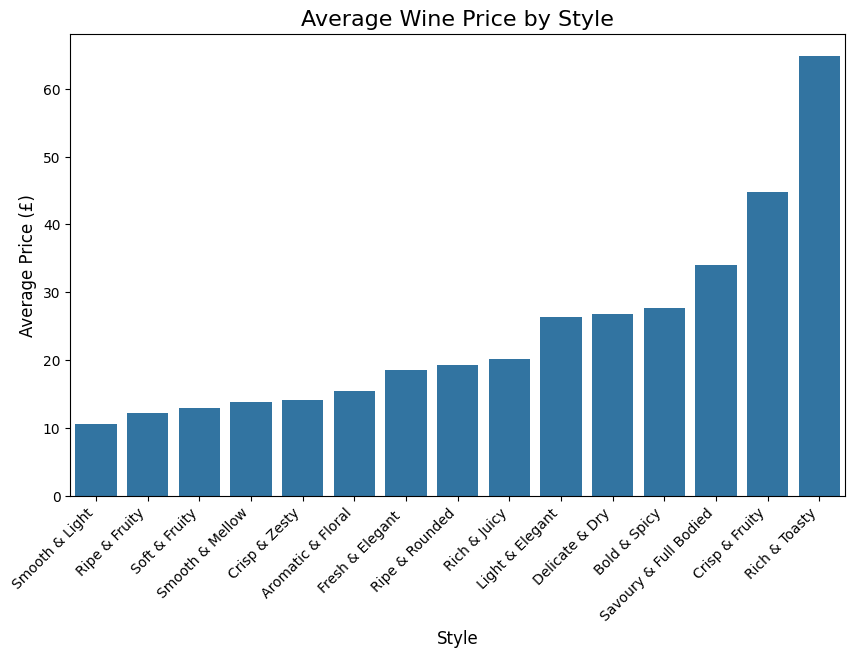

Region
Douro              17.277778
Lebanon            14.500000
Dordogne           14.500000
Catalunya          14.375000
California         14.300000
Alentejo           14.250000
Franschhoek        14.250000
Australia          14.250000
Rhône              14.224490
Castilla Y León    14.208333
Name: ABV, dtype: float64


In [103]:
# Average price by style
style_price = df_cleaned.groupby('Style')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=style_price.index, y=style_price.values )
plt.title('Average Wine Price by Style', fontsize=16)
plt.xlabel('Style', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# ABV by region
abv_region = df_cleaned.groupby('Region')['ABV'].mean().sort_values(ascending=False) 
print(abv_region.head(10))

# ascending określa kolejność sortowania danych, dla wartości False dane są sortowane od największych do najmniejszych wartości,
# dla wratości True są sortowane od najmniejszych do najniejszych

#  ha - horizontal alignment

In [123]:
df_cleaned.value_counts('Vintage')

# we can see that there are mixed vintages for example 2012/2015

mask=~(df_cleaned['Vintage'].str.contains('/'))
df_without_multivintage = df_cleaned[mask]
df_without_multivintage.head(4)

,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
Title,,,,,,,,,,,,,,,,
"Bread & Butter 'Winemaker's Selection' Chardonnay 2020/21, California",This really does what it says on the tin. It’s...,15.99,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,13.5,California,Rich & Toasty,2021,Napa Valley
"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,12.49,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,13.0,Marlborough,Crisp & Zesty,2022,NaN
Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,17.99,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,13.5,Burgundy,Ripe & Rounded,2022,Macon
"Bread & Butter 'Winemaker's Selection' Pinot Noir 2021, California",Bread & Butter is that thing that you can coun...,15.99,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,13.5,California,Smooth & Mellow,2021,Napa Valley


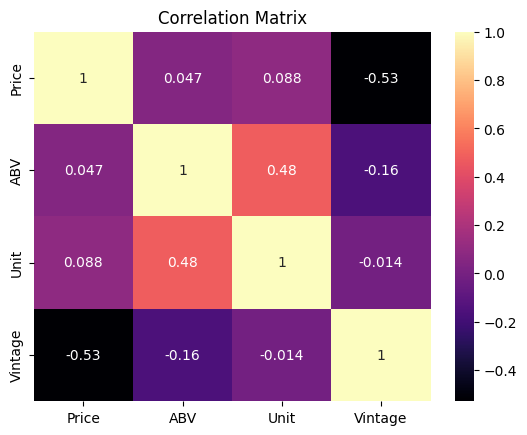

In [124]:
# correlation
# without multivintage wines
correlation_matrix = df_without_multivintage[['Price', 'ABV', 'Unit', 'Vintage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()


In [126]:
df_without_multivintage.value_counts('Capacity')
df_without_multivintage['Capacity'] = df_without_multivintage['Capacity'].str.replace('750CL', '75CL')


C:\Users\Martynaa\AppData\Local\Temp\ipykernel_13232\4142016626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_multivintage['Capacity'] = df_without_multivintage['Capacity'].str.replace('750CL', '75CL')


Capacity
75CL      1049
1.5LTR      13
37.5CL      12
750ML        8
150CL        7
50CL         5
300CL        1
375ML        1
500ML        1
Name: count, dtype: int64